In [52]:
import asyncio
import chess
import chess.pgn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
from stockfish import Stockfish

from chessproc import pgnproc
from chessproc import dfproc
from chessproc.GameAnalysis import GameAnalysis

pd.set_option('display.max_columns', 100)

# Create the Parquet from Downloaded files

In [53]:
nwnht = pgnproc.get_parquet_by_username('Polish_fighter3000', force_refresh=True)
nwnht

,Event,Site,Date,Round,White,Black,Result,CurrentPosition,Timezone,ECO,ECOUrl,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link,pgn,moves,player_result,player_colour,elo_difference,game_length,Username
0,Live Chess,Chess.com,2022-11-02,-,Polish_fighter3000,Hikaru,0-1,3Q4/1p3pk1/p1p3p1/P7/1P1P1qP1/2p2P1P/5K2/8 w - -,UTC,A00,https://www.chess.com/openings/Vant-Kruijs-Ope...,2022-11-02,0 days 19:03:07,2797,2831,900+2,Hikaru won by resignation,0 days 19:03:07,2022-11-02,0 days 19:32:29,https://www.chess.com/game/live/61154938155,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...","[[1., e3, 0:15:02], [1..., e5, 0:14:42.2], [2....",0,White,34,88,Polish_fighter3000
1,Live Chess,Chess.com,2022-11-02,-,Hikaru,Polish_fighter3000,1-0,5k2/b7/Pp5p/1B2p3/6P1/2p5/2K4P/8 b - g3,UTC,C65,https://www.chess.com/openings/Ruy-Lopez-Openi...,2022-11-02,0 days 18:05:29,2822,2822,900+2,Hikaru won by resignation,0 days 18:05:29,2022-11-02,0 days 18:28:13,https://www.chess.com/game/live/61151381579,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...","[[1., e4, 0:15:02], [1..., e5, 0:15:02], [2., ...",0,Black,0,63,Polish_fighter3000
2,Live Chess,Chess.com,2022-11-02,-,Polish_fighter3000,Hikaru,0-1,3r4/8/8/5n1p/R7/4pk1P/2K5/8 w - -,UTC,D30,https://www.chess.com/openings/Queens-Gambit-D...,2022-11-02,0 days 16:57:47,2853,2811,900+2,Hikaru won by resignation,0 days 16:57:47,2022-11-02,0 days 17:34:29,https://www.chess.com/game/live/61147235609,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...","[[1., d4, 0:15:02], [1..., Nf6, 0:15:01.2], [2...",0,White,-42,188,Polish_fighter3000
3,Live Chess,Chess.com,2022-11-02,-,Hikaru,Polish_fighter3000,1-0,3k4/1Q6/P1n3P1/8/3bKP2/8/2r5/8 b - -,UTC,C42,https://www.chess.com/openings/Petrovs-Defense...,2022-11-02,0 days 16:01:56,2799,2890,900+2,Hikaru won on time,0 days 16:01:56,2022-11-02,0 days 16:35:40,https://www.chess.com/game/live/61144117987,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...","[[1., e4, 0:15:02], [1..., e5, 0:15:00.5], [2....",0,Black,-91,125,Polish_fighter3000


# Get the pgn

In [103]:
nwnht_game_string = nwnht.iloc[1].pgn
nwnht_game_string[:20]

'[Event "Live Chess"]'

In [104]:
nwnht.query('Termination == "NWNHT won by checkmate" & Result == "0-1"')
nwnht[nwnht['Link'].apply(lambda x: x.endswith('10621664899'))]

,Event,Site,Date,Round,White,Black,Result,CurrentPosition,Timezone,ECO,ECOUrl,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link,pgn,moves,player_result,player_colour,elo_difference,game_length,Username


# Create GameAnalysis Instance

In [105]:
nwnht_analysis = GameAnalysis(pgn=nwnht_game_string,verbose=True)
print(nwnht_analysis.identifier)
nwnht_analysis.pgnheaders

61151381579


{'Event': 'Live Chess',
 'Site': 'Chess.com',
 'Date': '2022.11.02',
 'Round': '-',
 'White': 'Hikaru',
 'Black': 'Polish_fighter3000',
 'Result': '1-0',
 'BlackElo': '2822',
 'CurrentPosition': '5k2/b7/Pp5p/1B2p3/6P1/2p5/2K4P/8 b - g3',
 'ECO': 'C65',
 'ECOUrl': 'https://www.chess.com/openings/Ruy-Lopez-Opening-Berlin-Defense-4.d3-Bc5',
 'EndDate': '2022.11.02',
 'EndTime': '18:28:13',
 'Link': 'https://www.chess.com/game/live/61151381579',
 'StartTime': '18:05:29',
 'Termination': 'Hikaru won by resignation',
 'TimeControl': '900+2',
 'Timezone': 'UTC',
 'UTCDate': '2022.11.02',
 'UTCTime': '18:05:29',
 'WhiteElo': '2822'}

In [106]:
nwnht_analysis.analysis
nwnht_analysis.save_analysis()

Reading File


In [107]:
nwnht_analysis.analysis.head(5)

,MoveNumber,WB,Move,Clock,MoveEval,BestMove,BestMoveEval,MateIn,TopMoves,MoveRank,MoveCorr,MoveLoss
0,1,W,e2e4,0:15:02,46,e2e4,46,None,"[{'Centipawn': 46, 'Mate': None, 'Move': 'e2e4...",0,None,0.0
1,1,B,e7e5,0:15:02,38,c7c6,24,None,"[{'Centipawn': 24, 'Mate': None, 'Move': 'c7c6...",3,None,14.0
2,2,W,g1f3,0:15:02,58,g1f3,58,None,"[{'Centipawn': 58, 'Mate': None, 'Move': 'g1f3...",0,None,0.0
3,2,B,b8c6,0:15:03.5,41,b8c6,41,None,"[{'Centipawn': 41, 'Mate': None, 'Move': 'b8c6...",0,None,0.0
4,3,W,f1b5,0:15:02.4,43,f1b5,43,None,"[{'Centipawn': 43, 'Mate': None, 'Move': 'f1b5...",0,None,0.0


In [108]:
nwnht_analysis.analysis.TopMoves.iloc[-1]

array([{'Centipawn': 621, 'Mate': None, 'Move': 'g2g4'},
       {'Centipawn': 620, 'Mate': None, 'Move': 'h2h4'},
       {'Centipawn': 617, 'Mate': None, 'Move': 'c2c3'},
       {'Centipawn': 351, 'Mate': None, 'Move': 'b5d3'},
       {'Centipawn': 179, 'Mate': None, 'Move': 'b5e2'}], dtype=object)

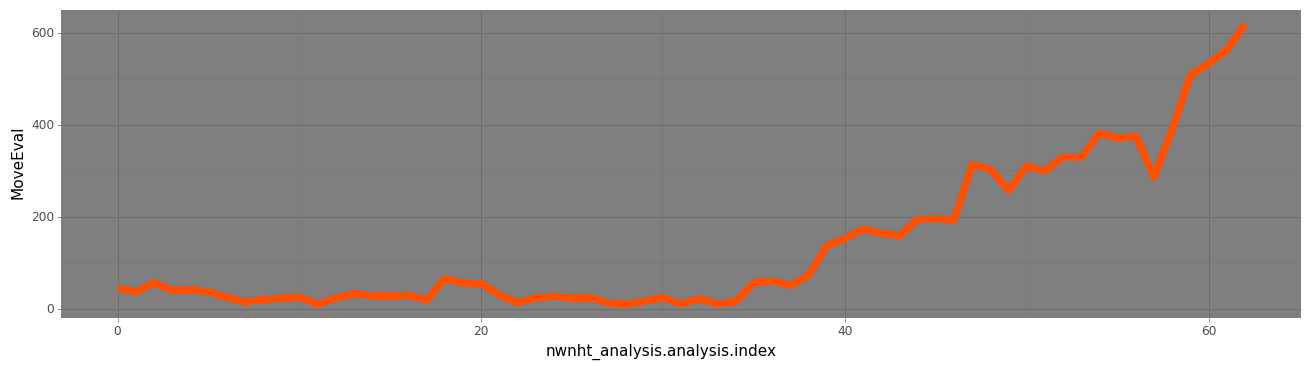

<ggplot: (397527516)>

In [109]:
(gg.ggplot(nwnht_analysis.analysis, gg.aes(x='nwnht_analysis.analysis.index', y='MoveEval'))
    + gg.geom_line(colour="#ff4f00", size=3)
    # + gg.scale_y_log10()
    + gg.theme_dark()
    + gg.theme(figure_size=(16, 4)))

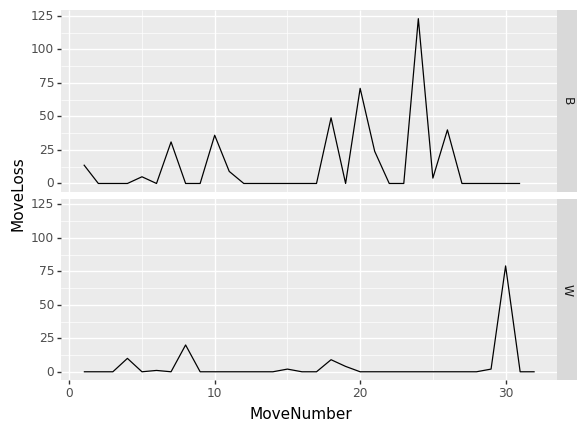

<ggplot: (397416668)>

In [110]:
(gg.ggplot(nwnht_analysis.analysis, gg.aes(x='MoveNumber', y='MoveLoss')) 
    + gg.facet_grid('WB ~ .') 
    + gg.geom_line())

In [111]:
nwnht_analysis.analysis.groupby('WB').agg(['sum', 'mean'])

/var/folders/zz/z3rhbf4x4hdb8gwyxnpw92_40000gn/T/ipykernel_96524/2265989314.py:1: FutureWarning: ['Move', 'Clock', 'BestMove', 'TopMoves'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.


MoveNumber       MoveEval             BestMoveEval             MateIn       \
          sum  mean      sum        mean          sum        mean    sum mean   
WB                                                                              
B         496  16.0     4167  134.419355         3761  121.322581      0  NaN   
W         528  16.5     4678  146.187500         4805  150.156250      0  NaN   

   MoveRank           MoveCorr      MoveLoss             
        sum      mean      sum mean      sum       mean  
WB                                                       
B        25  0.806452        0  NaN    406.0  13.096774  
W        13  0.406250        0  NaN    127.0   3.968750